# Electrolysis

Process enthaly change $\Delta H$ = 285.84 kJ/mol

Gibbs energy of the reaction at ambient temperature: $\Delta G$ = 237.2 kJ/mol

Electrolysis follows the reaction:

$H_2O \rightarrow H_2 + \frac{1}{2} O_2$.

http://www.helmeth.eu/index.php/technologies/high-temperature-electrolysis-cell-soec

Energy balance

In [11]:
mh2 = 1  # hydrogen mass [kg]
Mh = 1.008  # hydrogen molar mass [g/mol]
nomolh2 = mh2*1e3/2/Mh  # number of h2 mols
print("H2 mols in 1kg of H2: ", nomolh2)

H2 mols in 1kg of H2:  496.031746031746


In [12]:
dG = 285.84  # E[kJ/mol] required to split the H2O molecule
E = dH * nomolh2  # E[kJ] to produce 1kg of H2
E = E/3600  # E [kWh]
print("Electric energy required to produce 1kg of H2: ", E, "kWh")

Electric energy required to produce 1kg of H2:  39.384920634920626 kWh


### Mass balance

In [7]:
mw = 1  # mass of water [kg]
Mw = 18.0153  # water molar mass [g/mol]
nomolw = mw*1e3/Mw  # Number of mols of H_2O
nomolh2 = nomolw  # Number of mols of H_2 produced
nomolh2

55.50837343813314

In [8]:
Mh = 1.008  # hydrogen (H) molar mass [g/mol]
mh2 = nomolh2*2*Mh/1000  # hydrogen (H_2) mass produced
mh2

0.11190488085127642

In [9]:
mw = 1/mh2  # mass of water required to produce 1 kg of H_2
print("Mass of water required to produce 1kg of H2: ", mw, "kg")

Mass of water required to produce 1kg of H2:  8.936160714285714 kg


1 Nm$^3$ is 1 cubic meter at Normal temperature and pressure conditions (NTP).

T = 293.15 K and P = 1 atm

1 Nm$^3$ = 0.084 kg
(http://www.airproducts.com/Products/Gases/gas-facts/conversion-formulas/weight-and-volume-equivalents/hydrogen.aspx)

Next cells present data provided by some manufacturers. We only considered manufacturers that reported global energy consumption of the hydrogen production system.

<cite data-cite="6356110/SXGTBWZC"></cite>

In [43]:
# AccaGen: alkaline(bipolar) electrolizer
semin = 4.87  # specific energy [kWh/Nm^3]
semax = 6.7

seave = (semin+semax)/2
seave1 = seave/0.084
print("Required electrical energy: ", seave1, "kWh/H2kg")

Required electrical energy:  68.86904761904762 kWh/H2kg


In [44]:
# H2 Logic: alkaline(bipolar) electrolizer
semin = 5  # specific energy [kWh/Nm^3]
semax = 5.45

seave = (semin+semax)/2
seave2 = seave/0.084
print("Required electrical energy: ", seave2, "kWh/H2kg")

Required electrical energy:  62.20238095238094 kWh/H2kg


In [45]:
# Hydrogenics: PEM(bipolar) electrolizer
seave = 7.2 # specific energy [kWh/Nm^3]

seave3 = seave/0.084
print("Required electrical energy: ", seave3, "kWh/H2kg")

Required electrical energy:  85.71428571428571 kWh/H2kg


We can get an average for all these specific energies and take it as the specific energy for electrolysis.

In [46]:
see=(seave1+seave2+seave3)/3
print("specific energy for electrolysis: ", see, "kWh/kg H2")

specific energy for electrolysis:  72.26190476190476 kWh/kg H2


# High Temperature Electrolysis

From <cite data-cite="6356110/SXGTBWZC"></cite>, Solid Oxide Electrolyzers produced 17.6 Nl/h of hydrogen at 1000C and 39.3 W of applied power.

In [47]:
E = 39.3e-3  # Energy [kWh]
M = 17.6e-3*0.0899  # Mass of H2 [kg]
se1000 = E/M
print("Specific energy: ", se1000, "kWh/H2kg")  # Specific energy [kWh/kg]

Specific energy:  24.838204065122866 kWh/H2kg


For now we do not count with more accure information for temperatures in the range 600-1000C.
We are going to use a linear interpolation between normal electrolysis at room temperature and HTE at 1000C. I will look for more accurate values.

Text(0.5,0,'Temperature [$^\\circ$C]')

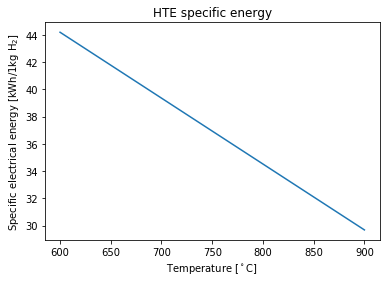

In [48]:
import matplotlib.pyplot as plt
seht = []
temp = [600, 700, 800, 900]
for T in temp:
    seht.append((se1000-see)/(1000-20)*(T-20)+see)

plt.plot(temp, seht)
plt.title('HTE specific energy')
plt.ylabel('Specific electrical energy [kWh/1kg H$_2$]')
plt.xlabel('Temperature [$^\circ$C]')